In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import missingno as msno

In [3]:
# Cargar el archivo CSV con los datos de sismos
data = pd.read_csv('/content/drive/MyDrive/2_Cursos/4_Henry/PF_Sismos/DB_EEUU/EEUU.csv')

In [4]:
# Visualizar las primeras filas del DataFrame
data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-06-19T14:18:56.000Z,37.301700,-104.4473,4.887,4.30,mb,56.0,39.0,0.16500,0.85,...,2023-06-21T19:31:38.329Z,"6 km WNW of Hoehne, Colorado",earthquake,2.39,3.734,0.113,22.0,reviewed,us,us
1,2023-06-19T14:13:07.071Z,37.279600,-104.4845,7.478,3.60,ml,51.0,52.0,0.15200,0.58,...,2023-06-21T14:53:07.300Z,"6 km NNW of El Moro, Colorado",earthquake,3.04,5.770,0.048,104.0,reviewed,us,us
2,2023-06-19T06:49:11.580Z,35.498000,-118.1450,6.810,3.57,ml,61.0,32.0,0.03874,0.15,...,2023-06-22T01:59:13.487Z,"32km ESE of Lake Isabella, CA",earthquake,0.12,0.380,0.159,111.0,reviewed,ci,ci
3,2023-06-18T03:44:59.090Z,39.089333,-123.0895,10.520,4.35,mw,92.0,64.0,0.04182,0.11,...,2023-06-24T17:59:32.612Z,"8km SE of Talmage, CA",earthquake,0.13,0.350,NaN,4.0,reviewed,nc,nc
4,2023-06-12T12:38:26.049Z,44.624200,-114.2504,6.163,3.70,mwr,45.0,32.0,0.28500,0.63,...,2023-06-25T08:12:40.673Z,southern Idaho,earthquake,2.46,4.872,0.033,86.0,reviewed,us,us


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19867 entries, 0 to 19866
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             19867 non-null  object 
 1   latitude         19867 non-null  float64
 2   longitude        19867 non-null  float64
 3   depth            19827 non-null  float64
 4   mag              19867 non-null  float64
 5   magType          19853 non-null  object 
 6   nst              14291 non-null  float64
 7   gap              15665 non-null  float64
 8   dmin             11396 non-null  float64
 9   rms              17397 non-null  float64
 10  net              19867 non-null  object 
 11  id               19867 non-null  object 
 12  updated          19867 non-null  object 
 13  place            19855 non-null  object 
 14  type             19867 non-null  object 
 15  horizontalError  11645 non-null  float64
 16  depthError       13977 non-null  float64
 17  magError    

In [7]:
# Filtrar las filas que contienen "MX" en la columna 'place'
filas_con_mx = data[data['place'].str.contains('Mexico', na=False)] #1527 filas

In [8]:
data = data.drop(filas_con_mx.index)

In [9]:
# Filtrar las filas que contienen "MX" en la columna 'place'
filas_con_mx = data[data['place'].str.contains('MX', na=False)] #1399 filas
filas_con_mx

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
12,2023-05-28T13:33:24.290Z,31.073333,-116.614167,5.67,3.58,ml,7.0,225.0,0.41740,0.12,...,2023-05-31T17:03:03.514Z,"72km S of Maneadero, B.C., MX",earthquake,0.48,31.61,0.218,170.0,reviewed,ci,ci
55,2023-04-14T14:56:56.320Z,32.521500,-115.625500,15.53,3.52,mlr,65.0,48.0,0.04057,0.27,...,2023-06-17T21:36:54.040Z,"8km SSW of Progreso, B.C., MX",earthquake,0.23,0.50,0.146,205.0,reviewed,ci,ci
60,2023-04-09T02:06:52.420Z,32.494667,-115.572667,14.57,3.65,ml,45.0,49.0,0.04365,0.33,...,2023-06-17T21:36:39.040Z,"10km S of Progreso, B.C., MX",earthquake,0.40,0.89,0.161,72.0,reviewed,ci,ci
72,2023-03-23T09:53:00.860Z,31.127500,-116.675000,10.04,3.94,ml,6.0,229.0,0.42970,0.14,...,2023-03-23T13:50:07.153Z,"66km S of Maneadero, B.C., MX",earthquake,0.61,1.35,0.188,44.0,reviewed,ci,ci
181,2022-11-07T05:10:26.660Z,31.509000,-115.782000,21.56,3.81,ml,9.0,164.0,0.11730,0.14,...,2023-01-21T19:27:11.040Z,"78km ESE of Maneadero, B.C., MX",earthquake,0.62,0.85,0.152,76.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19859,1960-01-23T16:09:08.540Z,31.993667,-116.000667,6.00,3.65,ml,3.0,348.0,0.88970,0.08,...,2016-01-28T19:43:20.180Z,"60km ENE of Ensenada, B.C., MX",earthquake,3.59,31.61,0.063,5.0,reviewed,ci,ci
19861,1960-01-12T23:15:00.200Z,31.673333,-116.234833,6.00,3.99,ml,5.0,343.0,1.07000,0.60,...,2016-01-28T19:52:01.930Z,"32km E of Maneadero, B.C., MX",earthquake,17.31,31.61,0.116,5.0,reviewed,ci,ci
19863,1960-01-07T17:51:32.350Z,32.221167,-115.904833,6.00,3.64,ml,3.0,340.0,0.79390,0.83,...,2016-01-28T19:43:06.290Z,"50km SW of Progreso, B.C., MX",earthquake,10.65,31.61,0.112,5.0,reviewed,ci,ci
19864,1960-01-03T21:08:13.560Z,31.097167,-116.079667,6.00,3.99,ml,4.0,353.0,1.65700,1.24,...,2016-01-28T20:00:38.470Z,"83km SE of Maneadero, B.C., MX",earthquake,77.36,31.61,0.131,5.0,reviewed,ci,ci


In [10]:
data = data.drop(filas_con_mx.index)

In [47]:
# Filtrar las filas que contienen "MX" en la columna 'place'
filas_con_mx = data[data['place'].str.contains('Canada', na=False)] #450 filas
filas_con_mx

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,fecha,year,country
109,2023-02-05T04:39:09.256Z,49.911200,-116.397100,1.000,3.90,ml,17.0,105.0,1.5530,0.75,...,3.940,1.721,0.045,66.0,reviewed,us,us,2023-02-05 04:39:09.256000+00:00,2023,Canada
120,2023-01-28T16:10:51.373Z,49.029900,-128.493500,10.000,4.00,mb,20.0,198.0,1.9740,1.07,...,6.490,2.003,0.134,18.0,reviewed,us,us,2023-01-28 16:10:51.373000+00:00,2023,Canada
162,2022-11-26T03:50:17.526Z,49.271400,-126.092300,33.380,4.90,mww,148.0,123.0,0.4990,0.61,...,7.940,3.895,0.053,34.0,reviewed,us,us,2022-11-26 03:50:17.526000+00:00,2022,Canada
417,2021-12-17T12:13:51.679Z,48.893400,-123.347700,16.880,3.70,mwr,NaN,42.0,0.1210,0.76,...,3.100,4.200,0.041,57.0,reviewed,us,us,2021-12-17 12:13:51.679000+00:00,2021,Canada
504,2021-10-12T14:56:18.917Z,49.200300,-128.139400,10.000,4.20,mwr,NaN,167.0,1.4410,0.61,...,4.500,1.900,NaN,NaN,reviewed,us,pgc,2021-10-12 14:56:18.917000+00:00,2021,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18098,1973-06-15T01:09:04.200Z,45.317000,-70.908000,12.000,4.80,mb,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,s,us,1973-06-15 01:09:04.200000+00:00,1973,Canada
18187,1972-11-09T04:19:19.600Z,48.428333,-123.277000,43.751,4.10,md,9.0,233.0,0.3874,0.17,...,3.283,3.060,0.060,3.0,reviewed,uw,uw,1972-11-09 04:19:19.600000+00:00,1972,Canada
18213,1972-07-05T10:16:40.240Z,49.366000,-127.517000,26.000,5.87,mw,NaN,NaN,NaN,NaN,...,NaN,3.900,0.200,NaN,reviewed,iscgem,iscgem,1972-07-05 10:16:40.240000+00:00,1972,Canada
18490,1971-01-25T21:37:52.860Z,48.418167,-123.272667,47.415,3.50,md,4.0,325.0,0.4575,0.00,...,0.022,0.010,0.050,4.0,reviewed,uw,uw,1971-01-25 21:37:52.860000+00:00,1971,Canada


In [48]:
data = data.drop(filas_con_mx.index)

In [49]:
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,fecha,year,country
0,2023-06-19T14:18:56.000Z,37.301700,-104.447300,4.887,4.30,mb,56.0,39.0,0.16500,0.85,...,2.39,3.734,0.113,22.0,reviewed,us,us,2023-06-19 14:18:56+00:00,2023,Colorado
1,2023-06-19T14:13:07.071Z,37.279600,-104.484500,7.478,3.60,ml,51.0,52.0,0.15200,0.58,...,3.04,5.770,0.048,104.0,reviewed,us,us,2023-06-19 14:13:07.071000+00:00,2023,Colorado
2,2023-06-19T06:49:11.580Z,35.498000,-118.145000,6.810,3.57,ml,61.0,32.0,0.03874,0.15,...,0.12,0.380,0.159,111.0,reviewed,ci,ci,2023-06-19 06:49:11.580000+00:00,2023,CA
3,2023-06-18T03:44:59.090Z,39.089333,-123.089500,10.520,4.35,mw,92.0,64.0,0.04182,0.11,...,0.13,0.350,NaN,4.0,reviewed,nc,nc,2023-06-18 03:44:59.090000+00:00,2023,CA
4,2023-06-12T12:38:26.049Z,44.624200,-114.250400,6.163,3.70,mwr,45.0,32.0,0.28500,0.63,...,2.46,4.872,0.033,86.0,reviewed,us,us,2023-06-12 12:38:26.049000+00:00,2023,southern Idaho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19856,1960-02-09T14:01:48.600Z,33.158833,-116.461333,6.000,3.70,ml,7.0,234.0,0.38830,0.64,...,6.46,31.610,0.129,10.0,reviewed,ci,ci,1960-02-09 14:01:48.600000+00:00,1960,CA
19858,1960-01-26T04:17:36.000Z,38.000000,-116.500000,NaN,4.90,ml,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,brk,1960-01-26 04:17:36+00:00,1960,Nevada
19860,1960-01-20T03:25:53.000Z,36.783000,-121.433000,NaN,5.00,ml,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,brk,1960-01-20 03:25:53+00:00,1960,California
19862,1960-01-11T19:08:39.970Z,37.161167,-117.827333,0.000,3.79,ml,6.0,275.0,0.33920,0.69,...,8.48,9.710,0.092,8.0,reviewed,ci,ci,1960-01-11 19:08:39.970000+00:00,1960,CA


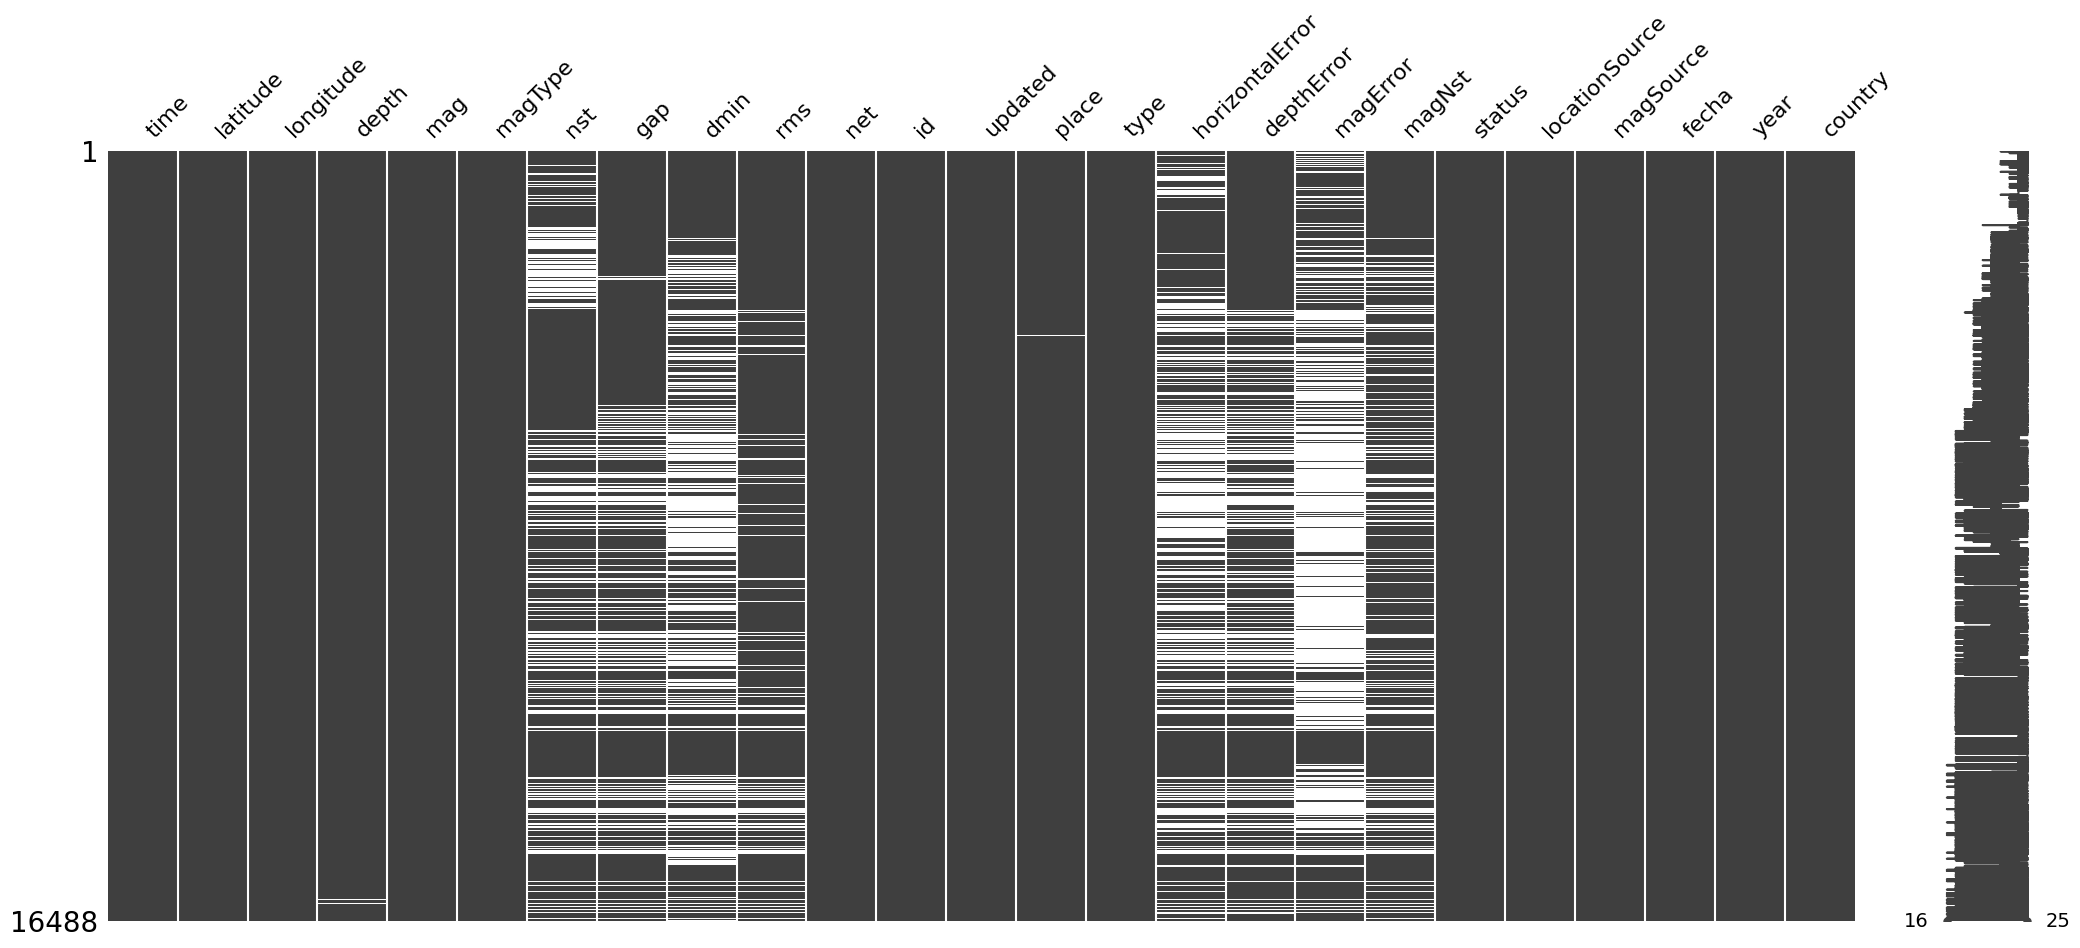

In [50]:
msno.matrix(data)

plt.show()

In [63]:


mapa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Coordenadas aproximadas del centro de los Estados Unidos

# Iterar sobre los registros del DataFrame y agregar marcadores al mapa
for index, row in data.head(5000).iterrows():
    latitud = row['latitude']
    longitud = row['longitude']
    #epicentro = row['epicentro']

    # Obtener la traducción del epicentro si está disponible, de lo contrario, usar el nombre original
    #nombre_epicentro = traducciones.get(epicentro, epicentro)

    marcador = folium.Marker(location=[latitud, longitud])
    marcador.add_to(mapa)

# Mostrar el mapa
mapa


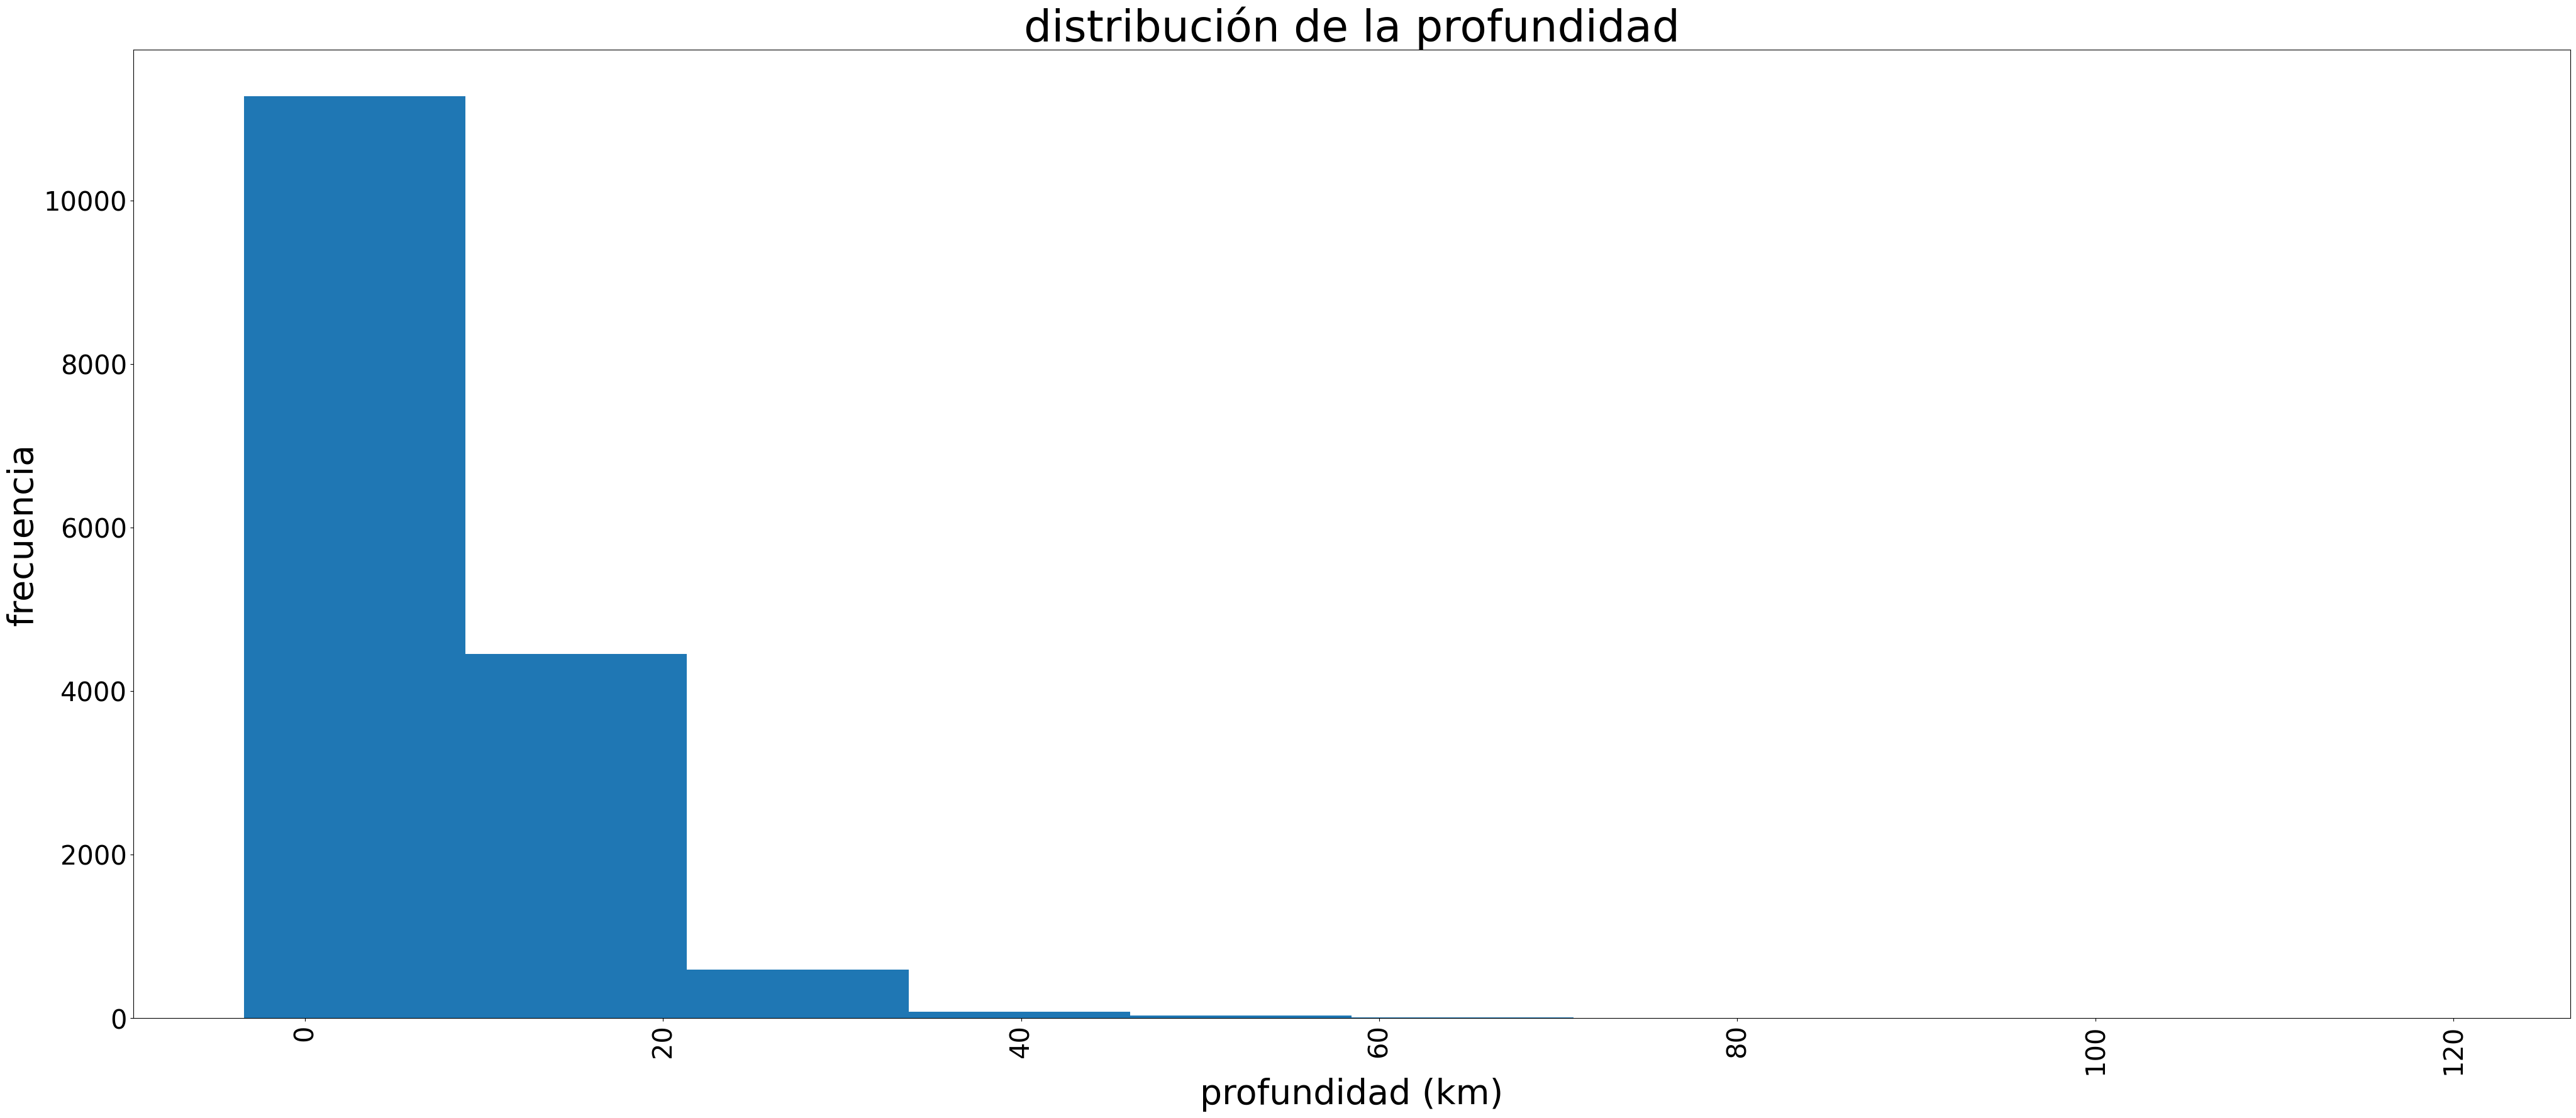

In [52]:
plt.figure(figsize=(50, 20))

df_sorted = data.sort_values('depth', ascending=False)

plt.hist(df_sorted['depth'])
plt.xlabel('profundidad (km)', fontsize=40)
plt.ylabel('frecuencia', fontsize=40)
plt.title('distribución de la profundidad', fontsize=50)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

plt.show()

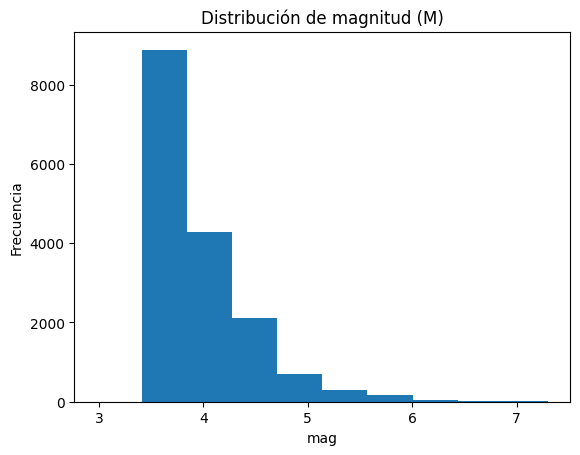

In [53]:
plt.hist(data['mag'])
plt.xlabel('mag')
plt.ylabel('Frecuencia')
plt.title('Distribución de magnitud (M)')
plt.show()

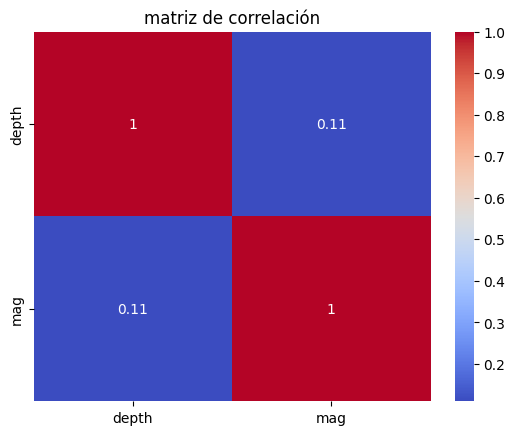

In [54]:
# Relaciones entre variables
correlation_matrix = data[['depth', 'mag']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('matriz de correlación')
plt.show()

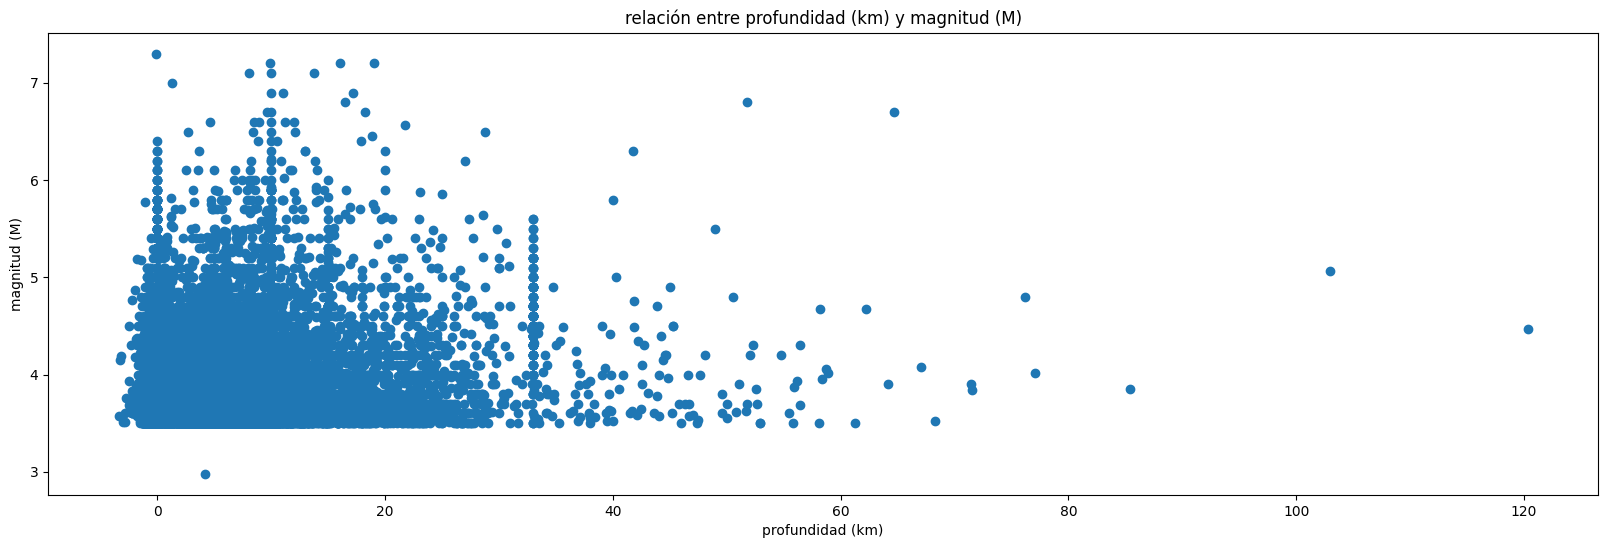

In [55]:
plt.figure(figsize=(20, 6))
plt.scatter(data['depth'], data['mag'])
plt.xlabel('profundidad (km)')
plt.ylabel('magnitud (M)')
plt.title('relación entre profundidad (km) y magnitud (M)')
plt.show()

In [56]:
data['fecha'] = pd.to_datetime(data['time'])

<Figure size 1200x600 with 0 Axes>

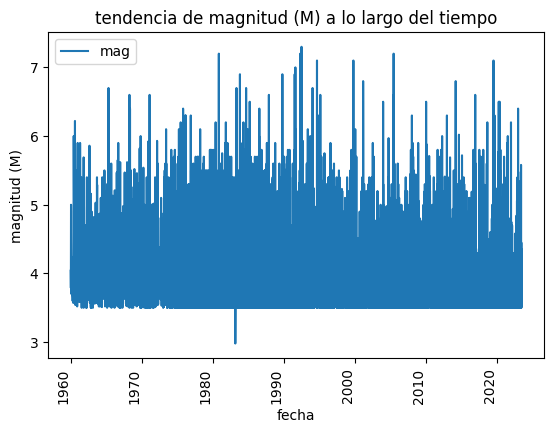

In [57]:
plt.figure(figsize=(12, 6))
data.plot(x='fecha', y='mag', kind='line')
plt.xlabel('fecha')
plt.ylabel('magnitud (M)')
plt.title('tendencia de magnitud (M) a lo largo del tiempo')
plt.xticks(rotation='vertical')
plt.show()

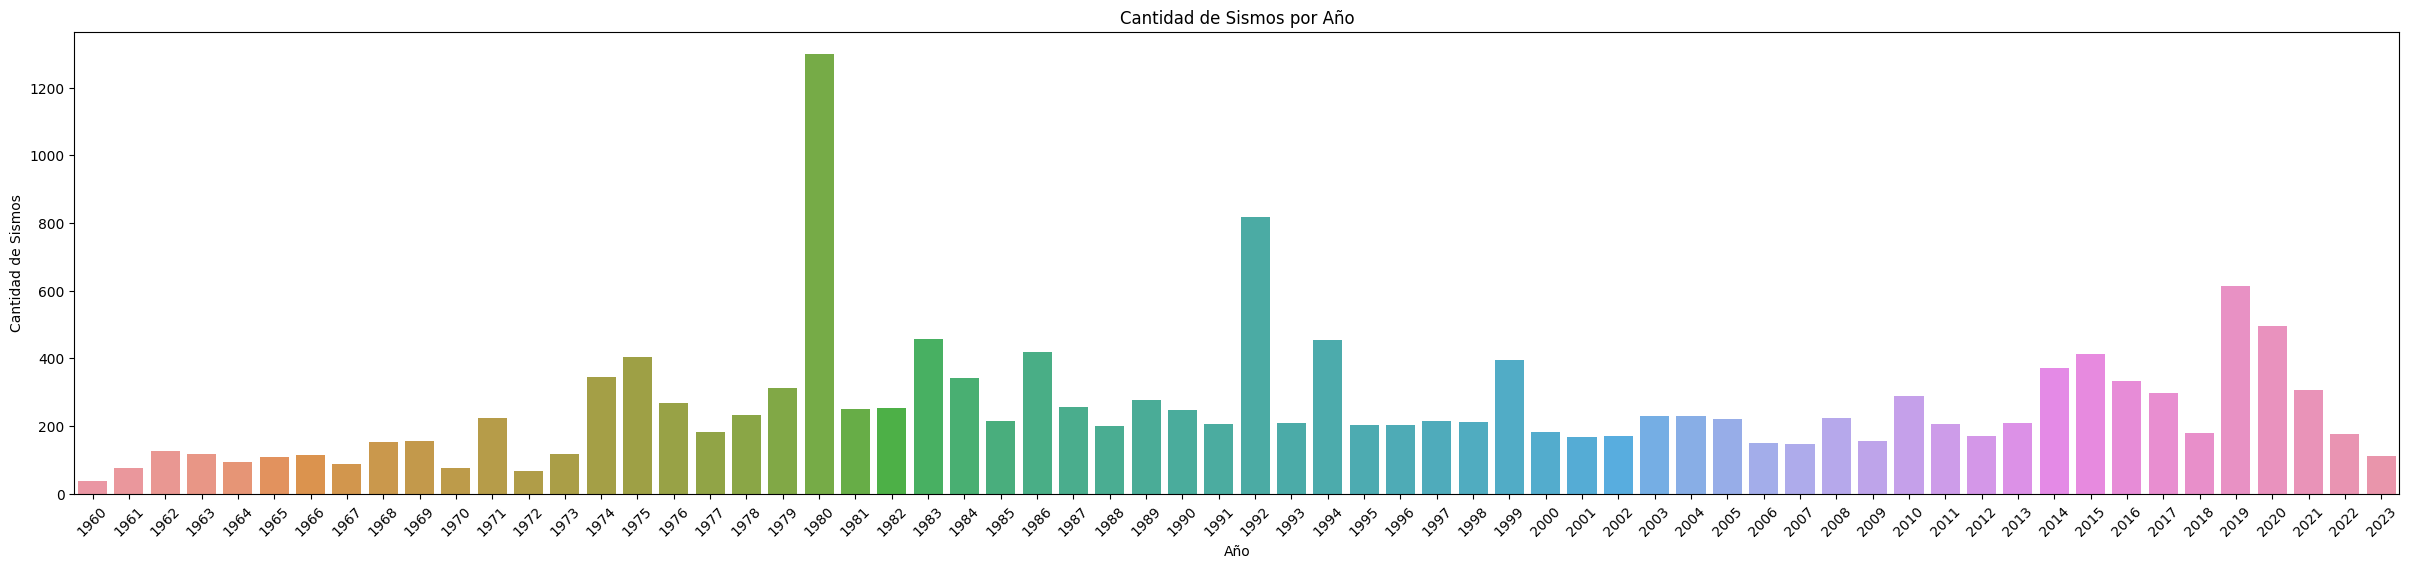

In [59]:
# Graficar la cantidad de sismos por año
data['year'] = pd.to_datetime(data['time']).dt.year
plt.figure(figsize=(30, 6))
sns.countplot(data=data, x='year')
plt.xlabel('Año')
plt.ylabel('Cantidad de Sismos')
plt.title('Cantidad de Sismos por Año')
plt.xticks(rotation=45)
plt.show()
